# Could the columbia river jsut be changing temperature??

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import datetime as dt

In [2]:
data = pd.read_csv('dodson453630122021400.csv',header=27).drop(0, axis=0)
data.datetime = pd.to_datetime(data.datetime)
data['117907_00010'] = data['117907_00010'].astype(float)
data = data.set_index('datetime').resample('D').mean()
data.head()

,117907_00010
datetime,
2007-10-01,17.091304
2007-10-02,16.883333
2007-10-03,16.916667
2007-10-04,16.729167
2007-10-05,16.354167


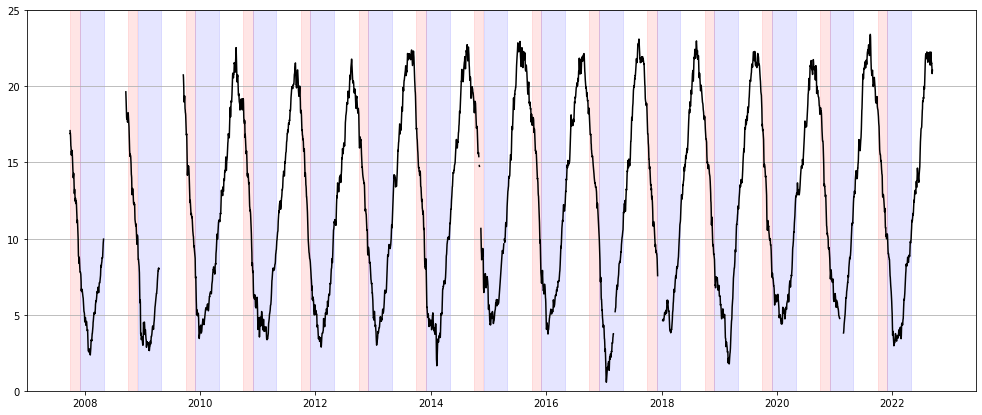

In [3]:
fig, ax = plt.subplots(1,1, figsize=(17,7))
ax.plot(data['117907_00010'],'k',zorder=3)
ax.set_ylim([0,25])
ax.grid(axis='y')

# we want to highlight october and november as the "warm" columbia river months
# dec, jan, feb, mar, april as the "cold" columbia river months

ax.fill_between(data.index, 0, 25, where=(data.index.month<=11)&(data.index.month>=10), color='r', alpha=0.1)
ax.fill_between(data.index, 0, 25, where=np.logical_or((data.index.month==12),(data.index.month<=4)), color='b', alpha=0.1)

### this looks pretty resonable to me!.. mayyybe the decrease in temp in november could cause this but not clear..
thought: perhaps both water masses ARE columbia but one group get advected a bit south before turning around north? <br>
the 2016 warm and cold here look reasonable compared to the JdF <br>
the 2017 warm looks a tad warmer than once at JdF, and the cold looks a lot colder

## look at winter runs daily instead of monthly
#### 2016/17

In [32]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

In [33]:
h = 3601
start = [h+24*i for i in range(182)]

In [34]:
dates = [dt.datetime(2016,10,1)+dt.timedelta(days=i) for i in range(len(start))]

In [35]:
Sshelf=4
Sslope=5

In [36]:
trans = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
temp = [np.mean(mydata.final_temp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)]) for i in range(len(start))]

Text(0.5, 1.0, '2016/17')

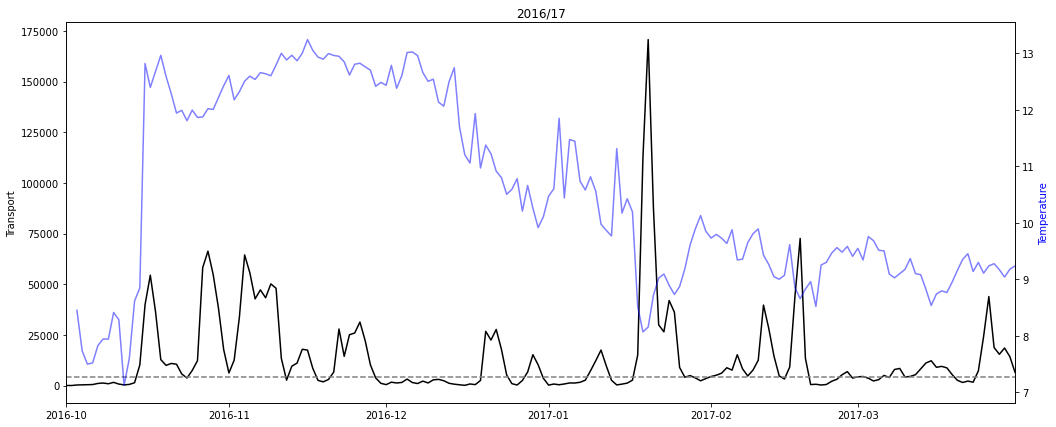

In [38]:
fig, ax = plt.subplots(1,1, figsize=(17,7))
ax.plot(dates,trans, 'k')
ax.set_ylabel('Transport')
ax.set_xlim([dates[0],dates[-1]])
ax.plot([dates[0],dates[-1]], [4000,4000], 'grey', ls='--')

ax2 = ax2=ax.twinx()
ax2.plot(dates,temp, 'b', label = 'Temperature Modelled', alpha =0.5)
# ax2.plot(data.index,data['117907_00010'], 'b--', label = 'Temperature Observed', alpha =0.5)
ax2.set_ylabel('Temperature', c='b')
ax2.set_xlim([dates[0],dates[-1]])

ax.set_title('2016/17')

In [39]:
# Choosing 5000 m3/s of freshwater inflow as a conservative limit for meaning the Columbia is penetrating the region
days = np.count_nonzero(np.array(trans) > 4000)
print('days of columbia river inflow = '+str(days))
print('percentage of winter days where the Columbia River matters = '+ str(np.round(days/182*100,2)))

days of columbia river inflow = 106
percentage of winter days where the Columbia River matters = 58.24


Text(0.5, 1.0, '2016/17')

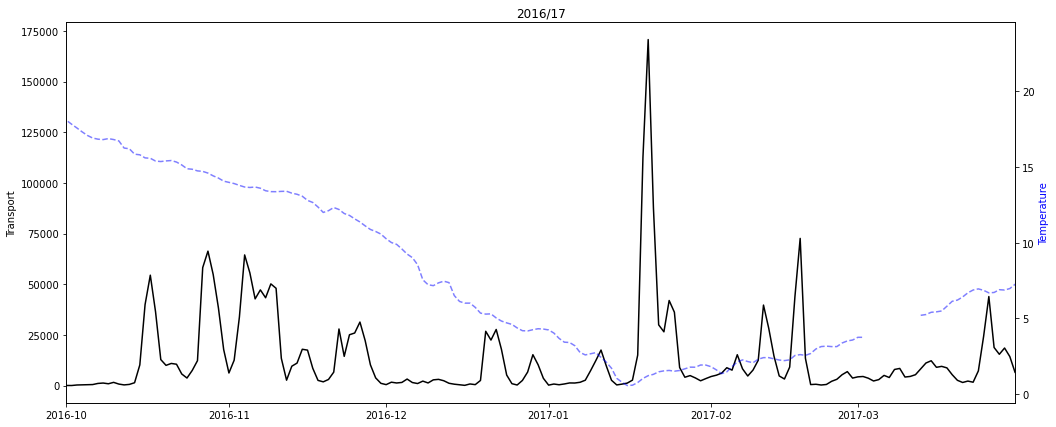

In [18]:
fig, ax = plt.subplots(1,1, figsize=(17,7))
ax.plot(dates,trans, 'k')
ax.set_ylabel('Transport')
ax.set_xlim([dates[0],dates[-1]])

ax2 = ax2=ax.twinx()
# ax2.plot(dates,temp, 'b', label = 'Temperature Modelled', alpha =0.5)
ax2.plot(data.index,data['117907_00010'], 'b--', label = 'Temperature Observed', alpha =0.5)
ax2.set_ylabel('Temperature', c='b')
ax2.set_xlim([dates[0],dates[-1]])

ax.set_title('2016/17')

* warm present in october and november - when flows are consistent and >>10.7 <br>
* lul in first half of december before comming back for jsut <10.7 <br>
* higher flows again in january when outflow is much cooler

#### 2017/18

In [40]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [41]:
dates = [dt.datetime(2017,10,1)+dt.timedelta(days=i) for i in range(len(start))]

In [42]:
trans = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
temp = [np.mean(mydata.final_temp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)]) for i in range(len(start))]

Text(0.5, 1.0, '2017/18')

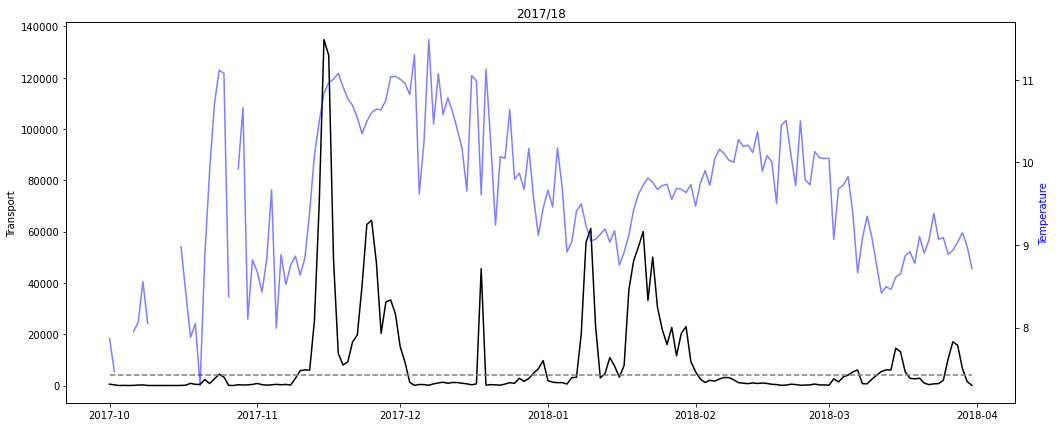

In [43]:
fig, ax = plt.subplots(1,1, figsize=(17,7))
ax.plot(dates,trans, 'k', label = 'Transport')
ax.set_ylabel('Transport')
ax.plot([dates[0],dates[-1]], [4000,4000], 'grey', ls='--')

ax2 = ax2=ax.twinx()
ax2.plot(dates,temp, 'b', label = 'Temperature', alpha =0.5)
ax2.set_ylabel('Temperature', c='b')

ax.set_title('2017/18')

In [44]:
# Choosing 5000 m3/s of freshwater inflow as a conservative limit for meaning the Columbia is penetrating the region
days = np.count_nonzero(np.array(trans) > 4000)
print('days of columbia river inflow = '+str(days))
print('percentage of winter days where the Columbia River matters = '+ str(np.round(days/182*100,2)))

days of columbia river inflow = 65
percentage of winter days where the Columbia River matters = 35.71


Text(0.5, 1.0, '2017/18')

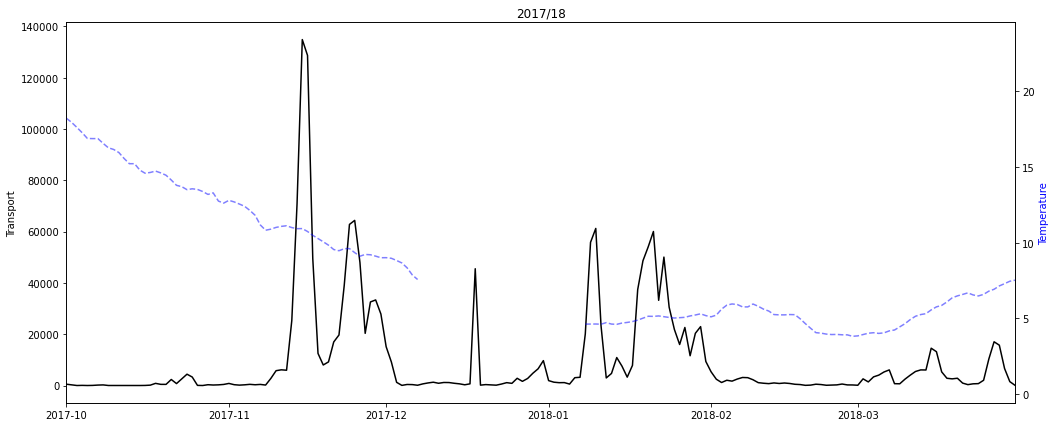

In [24]:
fig, ax = plt.subplots(1,1, figsize=(17,7))
ax.plot(dates,trans, 'k')
ax.set_ylabel('Transport')
ax.set_xlim([dates[0],dates[-1]])

ax2 = ax2=ax.twinx()
# ax2.plot(dates,temp, 'b', label = 'Temperature Modelled', alpha =0.5)
ax2.plot(data.index,data['117907_00010'], 'b--', label = 'Temperature Observed', alpha =0.5)
ax2.set_ylabel('Temperature', c='b')
ax2.set_xlim([dates[0],dates[-1]])

ax.set_title('2017/18')

* again quite the lul in december when the water is transitioning from warm to cool

#### summer - jstu days of importance

In [45]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

In [46]:
dates = [dt.datetime(2017,4,1)+dt.timedelta(days=i) for i in range(183)]

In [47]:
h = 3601
start = [h+24*i for i in range(183)]

In [48]:
trans = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
temp = [np.mean(mydata.final_temp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)]) for i in range(len(start))]

In [49]:
# Choosing 4000 m3/s of freshwater inflow as a conservative limit for meaning the Columbia is penetrating the region
days = np.count_nonzero(np.array(trans) > 4000)
print('days of columbia river inflow = '+str(days))
print('percentage of winter days where the Columbia River matters = '+ str(np.round(days/183*100,2)))

days of columbia river inflow = 15
percentage of winter days where the Columbia River matters = 8.2
